## Preprosessing



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from sklearn.cluster import KMeans
from google.colab import drive


In [2]:
# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#change direktori
%cd /content/drive/My Drive/Challenge DS Digistar

/content/drive/My Drive/Challenge DS Digistar


In [4]:
ls

Data/  logs.log


In [5]:
#load data
students_scores = pd.read_csv('Data/StudentsScores.csv')
students_scores


,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [6]:
# show total row dan columns
students_scores.shape

(1000, 9)

In [7]:
# drop last index
students_scores.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
# show column with null value
def null_percentage(data):
  total = data.isnull().sum().sort_values(ascending = False)
  total = total[total != 0]
  percent = round(100 * total/len(data),2)
  return pd.concat([total,percent], axis = 1, keys = ['Total Null', 'Percent'])

null_percentage(students_scores)

,Total Null,Percent
reading score,4,0.4
math score,3,0.3
writing score,3,0.3


In [9]:
#fill null value
students_scores = students_scores.fillna(0)

In [10]:
students_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# add column total score
students_scores['total score'] = students_scores['math score'] + students_scores['reading score'] + students_scores['writing score']
students_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223.0


In [12]:
students_scores.describe()

,math score,reading score,writing score,total score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.919000,68.932000,67.861000,202.712000
std,15.568906,15.165004,15.634517,43.371421
min,0.000000,0.000000,0.000000,27.000000
25%,57.000000,59.000000,57.000000,173.000000
50%,66.000000,70.000000,69.000000,205.000000
75%,77.000000,79.000000,79.000000,233.000000
max,100.000000,100.000000,100.000000,300.000000


### unique values columns

In [13]:
students_scores['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [14]:
students_scores['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [15]:
students_scores['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
students_scores['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [17]:
#make new columns for look condition score math, writing, reading and total : above mean or bellow mean
mean_math_score = round(students_scores['math score'].mean())
mean_reading_score = round(students_scores['reading score'].mean())
mean_writing_score = round(students_scores['writing score'].mean())
mean_total_score = round(students_scores['total score'].mean())

students_scores['type_math_score'] = students_scores.apply(lambda row : 'Above Mean' if row ['math score'] >= mean_math_score else 'Bellow Mean', axis = 1)
students_scores['type_writing_score'] = students_scores.apply(lambda row : 'Above Mean' if row ['writing score'] >= mean_reading_score else 'Bellow Mean', axis = 1)
students_scores['type_reading_score'] = students_scores.apply(lambda row : 'Above Mean' if row  ['reading score'] >= mean_writing_score else 'Bellow Mean', axis = 1)
students_scores['type_total_score'] = students_scores.apply(lambda row : 'Above Mean' if row ['total score'] >= mean_total_score else 'Bellow Mean', axis = 1)
students_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,type_math_score,type_writing_score,type_reading_score,type_total_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,Above Mean,Above Mean,Above Mean,Above Mean
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,Above Mean,Above Mean,Above Mean,Above Mean
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,Above Mean,Above Mean,Above Mean,Above Mean
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,Bellow Mean,Bellow Mean,Bellow Mean,Bellow Mean
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,Above Mean,Above Mean,Above Mean,Above Mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282.0,Above Mean,Above Mean,Above Mean,Above Mean
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172.0,Bellow Mean,Bellow Mean,Bellow Mean,Bellow Mean
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195.0,Bellow Mean,Bellow Mean,Above Mean,Bellow Mean
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223.0,Above Mean,Above Mean,Above Mean,Above Mean


## Exploratory Data Analysis

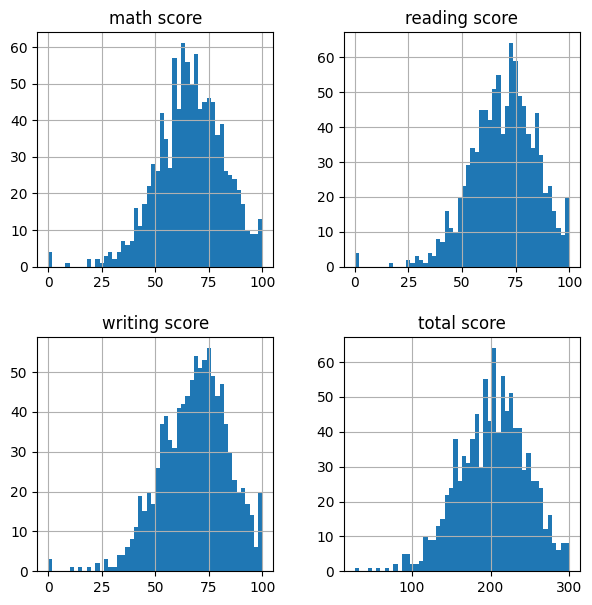

In [ ]:
students_scores.hist(bins= 50 , figsize = (7,7))
plt.show()

<ipython-input-17-ffaa639c7b2a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_preparation_course = students_scores['test preparation course'].astype('category').cat.codes).corr(),


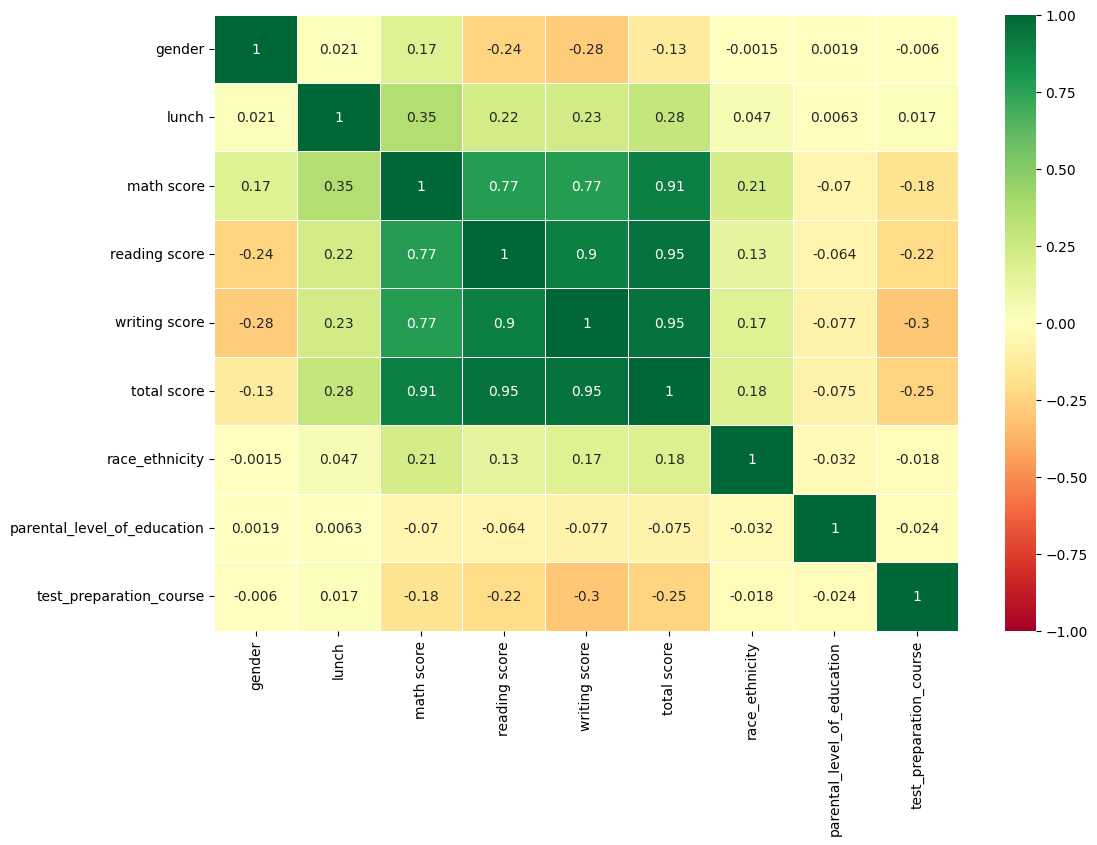

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(students_scores.assign(gender = students_scores.gender.astype('category').cat.codes,
                           race_ethnicity = students_scores['race/ethnicity'].astype('category').cat.codes,
                           parental_level_of_education	 = students_scores['parental level of education'].astype('category').cat.codes,
                           lunch  = students_scores.lunch .astype('category').cat.codes,
                           test_preparation_course = students_scores['test preparation course'].astype('category').cat.codes).corr(),
            annot = True, cmap ='RdYlGn', vmin = -1, vmax = 1, linewidths = 0.5)
plt.show()

In [ ]:
def boxplot(data, column):
  plt.figure(figsize = (10,7))
  sns.boxplot(x = data[column])
  plt.title(f'Boxplot {column}')
  plt.show()


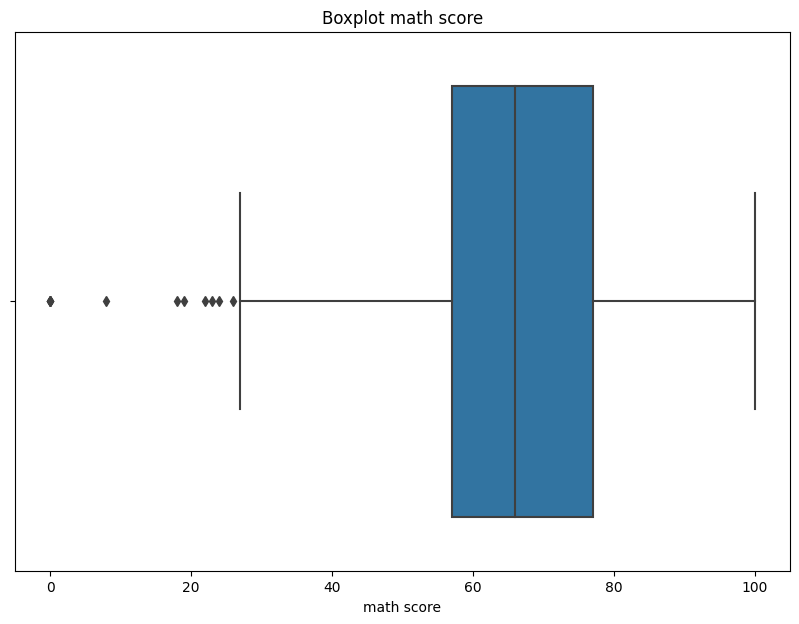

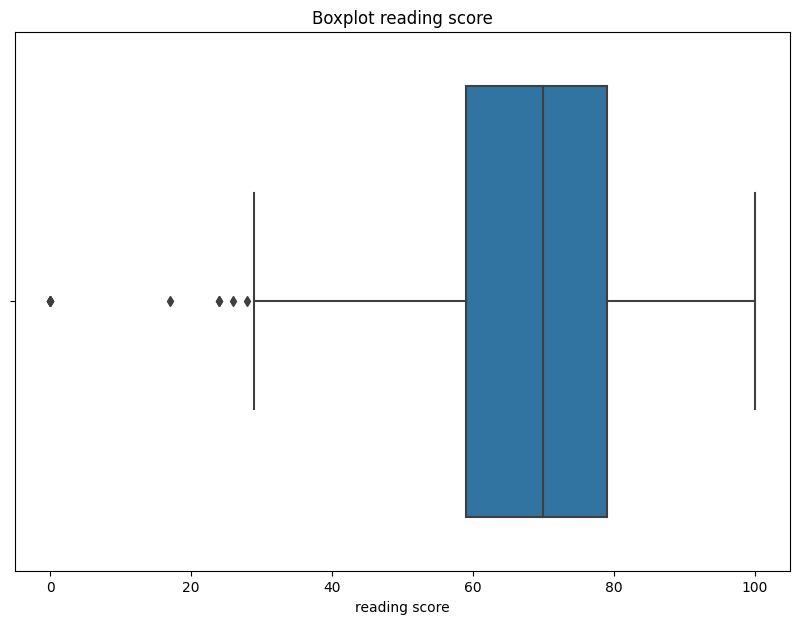

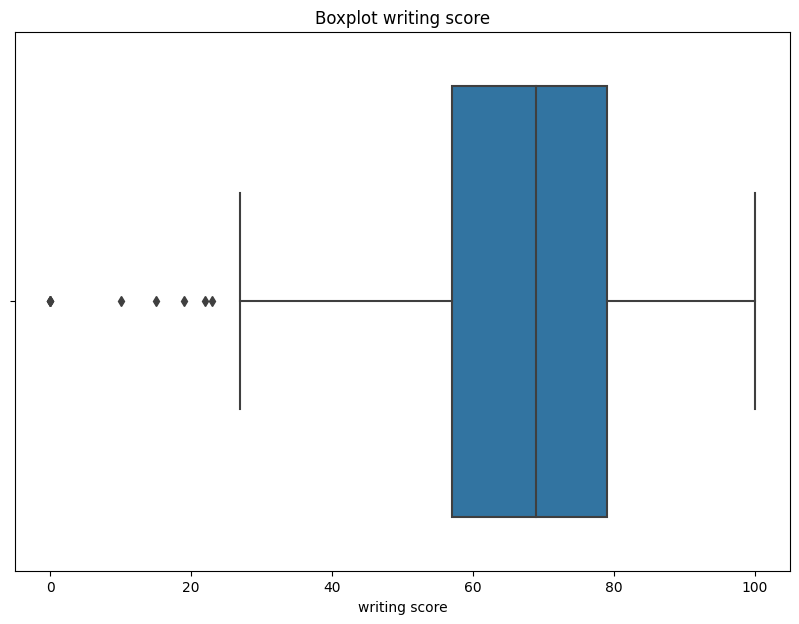

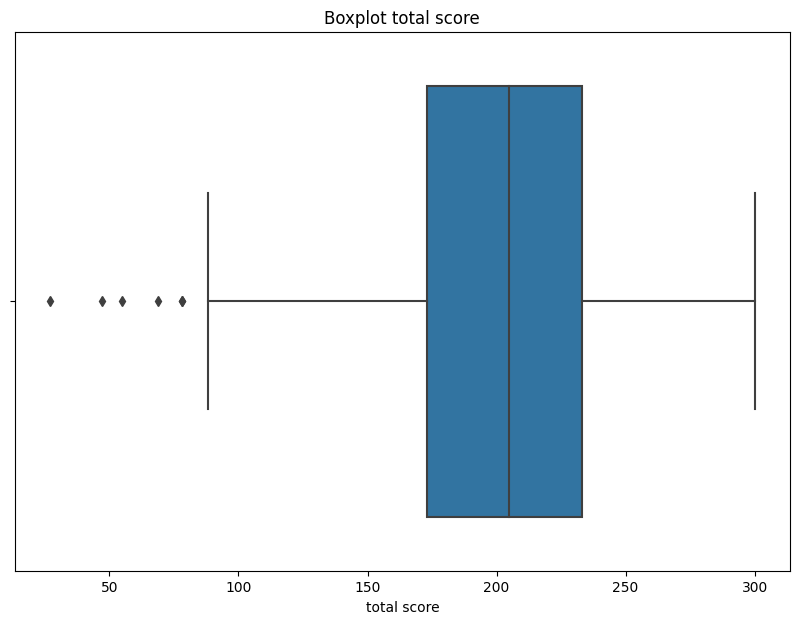

In [ ]:
# boxplot look outlier in numerical columns
boxplot(students_scores, 'math score')
boxplot(students_scores, 'reading score')
boxplot(students_scores, 'writing score')
boxplot(students_scores, 'total score')

### Analysist Gender

In [ ]:
count_gender = students_scores.groupby(['gender']).size().reset_index(name = 'count')

plot_count_gender = px.bar(count_gender, x = 'count', y = 'gender')
plot_count_gender

### Analysist race/ethinicity

In [ ]:
def race_ethnicity_score_type(score, data=students_scores):
  race_ethnicity = data.groupby(['race/ethnicity', score]).size().reset_index(name = 'Total')
  fig = px.bar(race_ethnicity, x = 'race/ethnicity', y = 'Total', color = score, barmode = 'group')
  fig.show()



In [ ]:
race_ethnicity_score_type('type_math_score')
race_ethnicity_score_type('type_writing_score')
race_ethnicity_score_type( 'type_reading_score')
race_ethnicity_score_type('type_total_score')


### Analysist parental level education

In [ ]:
def parental_type_score(data, score, title):
  data = data.loc[data[score] == 'Above Mean']
  data = data.groupby(['parental level of education', score]).size().reset_index(name = 'Total')
  data.sort_values('Total', ascending = False, inplace = True)

  fig = px.pie(data,
               values = data['Total'],
               names = data['parental level of education'],
               color = data['parental level of education'])
  fig.update_layout(title = f'Presentase Composition {title} Above Mean Based On Parental level Of Education')
  fig.show()

In [ ]:
parental_type_score(students_scores, 'type_math_score', 'Math Score')
parental_type_score(students_scores, 'type_writing_score', 'Writing Score')
parental_type_score(students_scores, 'type_reading_score', 'Reading Score')
parental_type_score(students_scores, 'type_total_score', 'Total Score')

### Analysist type lunch

In [ ]:
def lunch_type_score(data, score, title):
  data = data.groupby(['lunch', score]).size().reset_index(name = 'Total')
  fig = px.bar(data, x = 'lunch', y = 'Total', color = score, barmode = 'group')
  fig.update_layout(title = f'Student {title} Above Mean Based On Lunch Category')
  fig.show()

In [ ]:
lunch_type_score(students_scores, 'type_math_score', 'Math Score')
lunch_type_score(students_scores, 'type_reading_score', 'Reading Score')
lunch_type_score(students_scores, 'type_writing_score', 'Writing Score')
lunch_type_score(students_scores, 'type_total_score', 'Total Score')

### Analysist preparation course

In [ ]:
def preparation_course_type_score(data, score, title):
  data = data.loc[data[score] == 'Above Mean']
  data = data.groupby(['test preparation course', score]).size().reset_index(name = 'Total')
  data.sort_values('Total', ascending = False, inplace = True)

  fig = px.pie(data,
               values = data['Total'],
               names = data['test preparation course'],
               color = data['test preparation course'])
  fig.update_layout(title = f'Presentase Student {title} Above Mean Based on Preparation Test')
  fig.show()

In [ ]:
preparation_course_type_score(students_scores, 'type_math_score', 'Math Score')
preparation_course_type_score(students_scores, 'type_writing_score', 'Writing Score')
preparation_course_type_score(students_scores, 'type_reading_score', 'Reading Score')
preparation_course_type_score(students_scores, 'type_total_score', 'Total Score')

In [ ]:
def distribution_score_prepare_test(data, score):
  fig = px.box(data, x = 'test preparation course', y = score, points = 'all')
  fig.update_layout(title = f'Distribution {score} Based on Preparation Course')
  fig.show()


In [ ]:
distribution_score_prepare_test(students_scores, 'math score')
distribution_score_prepare_test(students_scores, 'writing score')
distribution_score_prepare_test(students_scores, 'reading score')
distribution_score_prepare_test(students_scores, 'total score')

## Machine Learning

In [ ]:
data = students_scores.dropna()

In [ ]:
drop_column = ['type_math_score', 'type_writing_score', 'type_reading_score', 'type_total_score']

for column in drop_column:
  data = data.drop([column], axis = 1)


In [ ]:
column_label_encoder = ['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'parental level of education']

for col in column_label_encoder:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])

numerical_columns = ['math score', 'reading score', 'writing score', 'total score']

for col in numerical_columns:
  scaler = MinMaxScaler()
  data[col] = scaler.fit_transform(data[[col]])

data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,0,1,1,1,1,0.72,0.72,0.74,0.699634
1,0,2,4,1,0,0.69,0.90,0.88,0.805861
2,0,1,3,1,1,0.90,0.95,0.93,0.919414
3,1,0,0,0,1,0.47,0.57,0.44,0.443223
4,1,2,4,1,1,0.76,0.78,0.75,0.739927
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.99,0.95,0.934066
996,1,2,2,0,1,0.62,0.55,0.55,0.531136
997,0,2,2,0,0,0.59,0.71,0.65,0.615385
998,0,3,4,1,0,0.68,0.78,0.77,0.717949


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

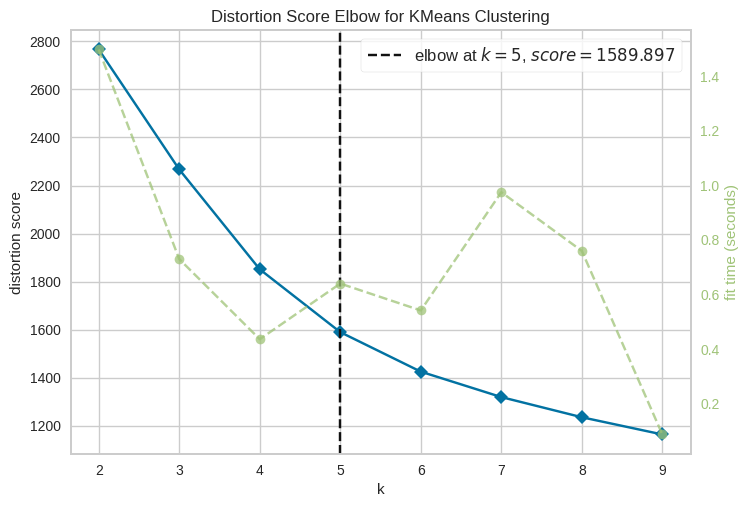

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data)
visualizer.show()

In [ ]:
optimal_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 5


In [ ]:

kmeans = KMeans(n_clusters = optimal_clusters, random_state = 42)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Cluster
0,0,1,1,1,1,0.72,0.72,0.74,0.699634,1
1,0,2,4,1,0,0.69,0.90,0.88,0.805861,2
2,0,1,3,1,1,0.90,0.95,0.93,0.919414,3
3,1,0,0,0,1,0.47,0.57,0.44,0.443223,1
4,1,2,4,1,1,0.76,0.78,0.75,0.739927,2
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.99,0.95,0.934066,0
996,1,2,2,0,1,0.62,0.55,0.55,0.531136,3
997,0,2,2,0,0,0.59,0.71,0.65,0.615385,3
998,0,3,4,1,0,0.68,0.78,0.77,0.717949,0


In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

# Membuat instance dari setup PyCaret
exp = setup(data, target='Cluster',  train_size=0.8, transformation=True, pca=True, pca_components=0.95, fix_imbalance=True, normalize = True, fix_imbalance_method='smote')

# Membandingkan beberapa model dan memilih yang terbaik
best_model = compare_models( fold=5)

# Melatih model terbaik menggunakan validasi silang dan tuning parameter
tuned_model = tune_model(best_model, optimize='F1', n_iter=100, search_library='scikit-learn')

# Melakukan prediksi menggunakan model tuned
predictions = predict_model(tuned_model, data)

# Menampilkan hasil prediksi
print(predictions)


,Description,Value
0,Session id,3048
1,Target,Cluster
2,Target type,Multiclass
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1140, 7)"
5,Transformed train set shape,"(940, 7)"
6,Transformed test set shape,"(200, 7)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9912,0.9999,0.9912,0.9918,0.9910,0.9890,0.9892,0.1840
lr,Logistic Regression,0.9900,0.9997,0.9900,0.9903,0.9900,0.9874,0.9875,5.7120
lda,Linear Discriminant Analysis,0.9875,0.9999,0.9875,0.9881,0.9875,0.9843,0.9845,0.1840
et,Extra Trees Classifier,0.9800,0.9994,0.9800,0.9803,0.9799,0.9749,0.9750,0.7700
lightgbm,Light Gradient Boosting Machine,0.9650,0.9977,0.9650,0.9666,0.9651,0.9561,0.9564,1.4300
rf,Random Forest Classifier,0.9487,0.9969,0.9487,0.9504,0.9487,0.9357,0.9362,0.6700
xgboost,Extreme Gradient Boosting,0.9412,0.9952,0.9412,0.9430,0.9413,0.9263,0.9267,0.9180
gbc,Gradient Boosting Classifier,0.9375,0.9952,0.9375,0.9401,0.9377,0.9215,0.9221,2.3340
svm,SVM - Linear Kernel,0.9025,0.0000,0.9025,0.9106,0.9027,0.8776,0.8797,0.3140
nb,Naive Bayes,0.8588,0.9796,0.8588,0.8596,0.8557,0.8229,0.8245,0.6880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9875,1.0000,0.9875,0.9882,0.9874,0.9843,0.9845
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9875,0.9996,0.9875,0.9882,0.9874,0.9843,0.9845
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9875,0.9990,0.9875,0.9882,0.9874,0.9843,0.9845


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9980,1.0000,0.9980,0.9980,0.9980,0.9975,0.9975


     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1        0.72           0.72           0.74   
1                          0        0.69       

In [ ]:
predictions

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Cluster,prediction_label,prediction_score
0,0,1,1,1,1,0.72,0.72,0.74,0.699634,1,1,0.9897
1,0,2,4,1,0,0.69,0.90,0.88,0.805861,2,2,0.9732
2,0,1,3,1,1,0.90,0.95,0.93,0.919414,3,3,0.7451
3,1,0,0,0,1,0.47,0.57,0.44,0.443223,1,1,1.0000
4,1,2,4,1,1,0.76,0.78,0.75,0.739927,2,2,0.9255
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.99,0.95,0.934066,0,0,0.9332
996,1,2,2,0,1,0.62,0.55,0.55,0.531136,3,3,0.9968
997,0,2,2,0,0,0.59,0.71,0.65,0.615385,3,3,0.9920
998,0,3,4,1,0,0.68,0.78,0.77,0.717949,0,0,0.9138


In [ ]:
def input_data